Adınız: Nujoud.

Soyadınız: Alkhatib.

Okul Numaranız: 2312721326.

GitHub Repo Bağlantısı:https://github.com/Nujoud72/CNN_Siniflandirma

**from google.colab import files:** Google Colab üzerinde dosya yükleyip indirmek için files kütüphanesini kullanıyoruz.

**uploaded = files.upload():** Bu fonksiyon, kullanıcıdan dosya yüklemesi isteme işlemini başlatır. Yüklenen dosyalar uploaded adlı değişkende saklanır.kalın metin

In [2]:
from google.colab import files
uploaded = files.upload()


Saving bileklik.zip to bileklik.zip


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**!unzip:** Bu, Colab'da sistem komutları çalıştırmak için kullanılan bir önek (!). Bu komutla, unzip programını çalıştırarak bir ZIP dosyasını çıkarabiliyoruz.

**bileklik.zip:** Çıkarılacak olan dosyanın adı. Bu dosya, bileklik.zip adlı zip arşividir.

**-d dataset:** Bu seçenek, dosyanın çıkarılacağı hedef dizini belirtir. dataset adlı klasöre çıkartma işlemi yapılır. Eğer bu klasör mevcut değilse, otomatik olarak oluşturulur.

Bu komut, bileklik.zip dosyasındaki içerikleri dataset klasörüne çıkarır.

In [11]:
!unzip bileklik.zip -d dataset


Archive:  bileklik.zip
   creating: dataset/Bileklik/
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.05.35.jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.05.36 (1).jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.05.36 (2).jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.05.36.jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.06.45.jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.06.46.jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.06.47 (1).jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.06.47.jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.06.48 (1).jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.06.48.jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.06.49 (1).jpeg  
  inflating: dataset/Bileklik/WhatsApp Image 2025-12-06 at 14.06.49.jpeg  
  inflating: dataset/Bilek

In [12]:
from google.colab import files
uploaded = files.upload()


Saving saat.zip to saat.zip


In [13]:
!unzip saat.zip -d dataset


Archive:  saat.zip
   creating: dataset/Saat/
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.12.27.jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.07.jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.13.jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.14.jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.15.jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.16.jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.19 (1).jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.19 (2).jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.19.jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.20 (1).jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.20.jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.25 (1).jpeg  
  inflating: dataset/Saat/WhatsApp Image 2025-12-06 at 14.19.25.jpeg  
  inflating: da

**import tensorflow as tf:** TensorFlow kütüphanesini içeri aktarıyoruz. TensorFlow, makine öğrenmesi ve derin öğrenme modelleri oluşturmak için kullanılan popüler bir kütüphanedir.

from tensorflow.keras.preprocessing.image import ImageDataGenerator:kalın metin Görsel verileri ön işlemek için kullanılan ImageDataGenerator sınıfını içeri aktarıyoruz. Bu sınıf, veriler üzerinde çeşitli veri artırma (augmentation) ve ön işleme işlemleri yapabilir.

**import matplotlib.pyplot as plt:** Verileri görselleştirmek için kullanılan matplotlib kütüphanesini ve pyplot modülünü içeri aktarıyoruz. Bu, grafik ve görsel çıkartmalar yapmak için kullanılır.

**print("TensorFlow Version:", tf.__version__):** TensorFlow'un hangi sürümünün yüklü olduğunu terminalde yazdırıyoruz. Bu, kullanılan TensorFlow sürümünü kontrol etmemize olanak tanır.

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.19.0


**IMG_SIZE = 128:** Görsellerin yeniden boyutlandırılacağı hedef boyut. Burada 128x128 olarak belirledik, ancak gerekirse 64x64 de kullanabilirsiniz.

**ImageDataGenerator:** Bu sınıf, görselleri okur, veri artırma ve ön işleme uygular. rescale=1/255 ile görsellerin her pikselini 0-1 aralığına ölçeklendiriyoruz (bu, modelin daha hızlı öğrenmesini sağlar).

**validation_split=0.2:** Verilerin %80'ini eğitim için, %20'sini ise doğrulama için ayırır.

**train = datagen.flow_from_directory(...):** Eğitim verisini belirtilen klasörden yükler. Burada görsellerin bulunduğu dizini ve hedef boyutları belirtiyoruz. Ayrıca, her seferinde 16 görselin işlendiği bir batch boyutu belirliyoruz.

**val = datagen.flow_from_directory(...): **Doğrulama verisini belirtilen klasörden yükler ve aynı şekilde işleme uygular.

Bu işlem, verilerinizi modelinizin anlayacağı bir formatta hazır hale getirir ve eğitim sırasında kullanılacak veri setlerini oluşturur.

In [ ]:
IMG_SIZE = 128   # gerekirse 64 yapabilirsin

datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2      # %80 eğitim - %20 doğrulama
)

train = datagen.flow_from_directory(
    "dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode="categorical",
    subset="training"
)

val = datagen.flow_from_directory(
    "dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)


Found 161 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


**tf.keras.Sequential(...):** Keras'ta modelin katmanlarını sırasıyla eklemek için kullanılan bir yapı. Her katman bir önceki katmanın çıktısını alır.

**Conv2D: **Konvolüsyonel katman, görüntülerdeki özellikleri öğrenmek için kullanılır. Burada 32, 64 ve 128 adet filtre kullanılıyor, her birinin boyutu 3x3.

**MaxPooling2D:** Görüntüyü daha küçük boyutlara indirir (örneğin 2x2). Bu, modelin öğrenmesini hızlandırır ve hesaplama gücünü azaltır.

**Flatten:** Çok boyutlu veriyi tek boyutlu hale getirir, yani bir vektör oluşturur.

**Dense:** Tam bağlantılı katman, modelin nihai tahminini yapmak için kullanılır.

**Dropout:** Eğitim sırasında bazı nöronları rastgele devre dışı bırakır, bu da overfitting (aşırı öğrenme) ile mücadeleye yardımcı olur.

**softmax:** Çıkış katmanında, her sınıfa ait olasılıkları hesaplamak için kullanılan aktivasyon fonksiyonudur (iki sınıf olduğu için burada 2 kullanılıyor).

**model.compile(...):** Modeli derleriz, burada optimizasyon algoritması olarak "adam" seçilmiştir ve kayıp fonksiyonu olarak "categorical_crossentropy" kullanılmıştır. Bu, çoklu sınıflandırma için yaygın olarak kullanılan bir kayıp fonksiyonudur.

Son olarak, model.summary() ile modelin katmanları ve parametre sayısı hakkında bir özet görüntülenir. Bu, modelin genel yapısını ve parametrelerini kontrol etmenizi sağlar.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

**model.fit(...):** Bu fonksiyon, modelin eğitim verileriyle eğitilmesini başlatır.

**train:** Eğitim verisi (train veri kümesi, daha önce flow_from_directory ile oluşturulmuştu).

**validation_data=val:** Doğrulama verisi. Model eğitim sırasında doğrulama verisi üzerinde de test edilir (bu, modelin doğruluğunu ve aşırı öğrenmesini (overfitting) izlemenizi sağlar).

**epochs=10:** Modelin eğitim verisi üzerinde 10 kez geçmesini (epoch) belirtir. Yani model, tüm eğitim verisini 10 kez görecek ve her geçişte öğrenme yapacak.

fit fonksiyonu çalıştırıldığında, model her epoch sonunda eğitim ve doğrulama doğruluğunu yazdırır. Eğitim bitiminde, history nesnesi modelin eğitim sürecinde elde edilen tüm verileri (örneğin doğruluk ve kayıp değerleri) saklar. Bu veriyi daha sonra görselleştirme veya analiz yapmak için kullanabilirsiniz.

In [ ]:
history = model.fit(train, validation_data=val, epochs=10)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.6078 - loss: 0.8406 - val_accuracy: 0.8750 - val_loss: 0.5255
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8056 - loss: 0.4430 - val_accuracy: 0.8750 - val_loss: 0.3088
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9509 - loss: 0.1570 - val_accuracy: 0.9250 - val_loss: 0.1397
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9520 - loss: 0.1251 - val_accuracy: 0.9500 - val_loss: 0.2087
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9669 - loss: 0.0546 - val_accuracy: 0.7500 - val_loss: 0.7707
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9687 - loss: 0.0834 - val_accuracy: 0.7750 - val_loss: 0.4847
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9669 - loss: 0.0664 - val_accuracy: 0.8750 - val_loss: 0.4848
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9953 - loss: 0.0264 - val_accuracy: 0.7750 - val_loss:

**history.history["accuracy"]:** Modelin eğitim doğruluğunun (accuracy) her epoch'taki değerini alır.

**history.history["val_accuracy"]:** Modelin doğrulama doğruluğunun (val_accuracy) her epoch'taki değerini alır.

**plt.plot(...):** Bu fonksiyon, belirtilen veriyi bir çizgiyle grafik üzerinde gösterir. İlk çizgi eğitim doğruluğunu, ikinci çizgi ise doğrulama doğruluğunu temsil eder.

**plt.legend():** Grafikte hangi çizginin neyi temsil ettiğini belirten bir açıklama kutusu ekler.

**plt.show():** Grafiği görüntüler.

Bu kod, modelin eğitim sürecinde eğitim ve doğrulama doğruluğunun nasıl değiştiğini görselleştirir. Bu tür bir görselleştirme, modelin ne kadar iyi öğrendiğini ve aşırı öğrenme (overfitting) olup olmadığını değerlendirmenize yardımcı olabilir.

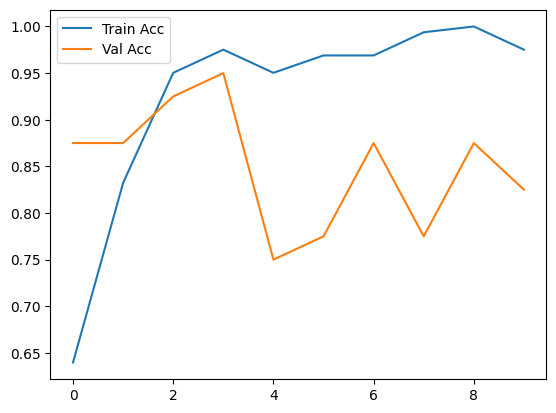

In [ ]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.show()


**model.save("bileklik_saat_128x128_CNN.keras"):** Bu fonksiyon, eğitilen modeli belirtilen dosya adıyla kaydeder. Burada model, bileklik_saat_128x128_CNN.keras ismiyle Keras formatında kaydedilmektedir. Bu format, Keras'ın kendi yerel formatıdır ve .h5 formatından daha güncel ve önerilen bir format olarak kullanılmaktadır.

Bu dosya daha sonra yüklenip (modeli tekrar eğitmeden) tahmin yapmak için kullanılabilir. Bu şekilde modeli başka bir zaman veya başka bir ortamda yeniden kullanabilirsiniz.

In [ ]:
model.save("bileklik_saat_128x128_CNN.keras")


**import numpy as np:** numpy, Python'da sayısal işlemler yapabilmek için kullanılan bir kütüphanedir. Genellikle diziler ve matrisler ile çalışırken kullanılır.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay: Bu satır, scikit-learn kütüphanesinden confusion_matrix ve ConfusionMatrixDisplay sınıflarını import eder.

**confusion_matrix:** Modelin tahminlerini ve gerçek etiketlerle karşılaştırarak karışıklık matrisini hesaplar. Bu matris, modelin hangi sınıfları doğru veya yanlış sınıflandırdığı hakkında bilgi verir.

**ConfusionMatrixDisplay:** Karışıklık matrisini görselleştirmek için kullanılan bir araçtır. Bu sayede matrisin görsel olarak daha anlaşılır bir şekilde sunulmasını sağlar.

Bu iki araç, modelin performansını değerlendirmek için sıkça kullanılır, özellikle çoklu sınıflandırma problemlerinde doğru ve yanlış sınıflandırmaları görmek için faydalıdır.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


**val.reset():** ImageDataGenerator'ı kullanarak veri akışını sıfırlıyoruz. Bu, veri kümesinin yeniden başlatılması ve ardışık tahminlerde herhangi bir hata olmaması için gereklidir.

**predictions = model.predict(val):** Modelin doğrulama verisi üzerinde tahmin yapmasını sağlar. val veri kümesi, doğrulama verisi olup modelin bu veriye dair tahminler üretmesini bekleriz.

**predicted_classes = np.argmax(predictions, axis=1):** Modelin tahminlerinin her bir örnek için hangi sınıfa ait olduğunu belirler. np.argmax fonksiyonu, her tahminin en yüksek olasılık değerine sahip olan sınıf etiketini alır (yani, tahmin edilen sınıfı).

**true_classes = val.classes:** Doğrulama verisindeki gerçek sınıfları alır. val.classes, genellikle her görüntü için sırasıyla gerçek etiketleri içerir.

**class_labels = list(val.class_indices.keys()):** val.class_indices sözlüğü, sınıf adlarını (etiketleri) ve her sınıfın indeksini içerir. Bu satır, sınıf etiketlerinin adlarını bir listeye dönüştürür.

Bu adımlar, modelin tahminlerini ve gerçek etiketleri karşılaştırmak için kullanılır ve ardından modelin performansını değerlendirmek üzere karışıklık matrisi gibi metrikler hesaplanabilir.

In [ ]:
val.reset()
predictions = model.predict(val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val.classes
class_labels = list(val.class_indices.keys())


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


**cm = confusion_matrix(true_classes, predicted_classes):** Bu satır, modelin doğrulama verisi üzerindeki tahminlerini ve gerçek etiketlerini karşılaştırarak karışıklık matrisini hesaplar. true_classes gerçek etiketleri, predicted_classes ise modelin tahmin ettiği sınıfları içerir. Sonuç olarak, cm değişkeni karışıklık matrisini tutar.

**disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels):** Bu satır, hesaplanan karışıklık matrisini görselleştirmek için ConfusionMatrixDisplay sınıfını kullanır. cm burada karışıklık matrisini, class_labels ise matrisin satır ve sütunlarında kullanılacak sınıf etiketlerini belirtir.

**disp.plot(cmap="Blues", values_format="d"):** Bu satır, karışıklık matrisini grafik olarak gösterir. cmap="Blues" renk paletini belirler (grafikte mavi tonları kullanılır). values_format="d" ise hücrelerdeki değerlerin tam sayı (integer) formatında gösterileceğini belirtir.

Bu işlem, modelin hangi sınıfları doğru ve yanlış sınıflandırdığını görsel olarak incelemenizi sağlar. Karışıklık matrisi, her bir sınıf için doğru ve yanlış tahminlerin sayısını içerir.

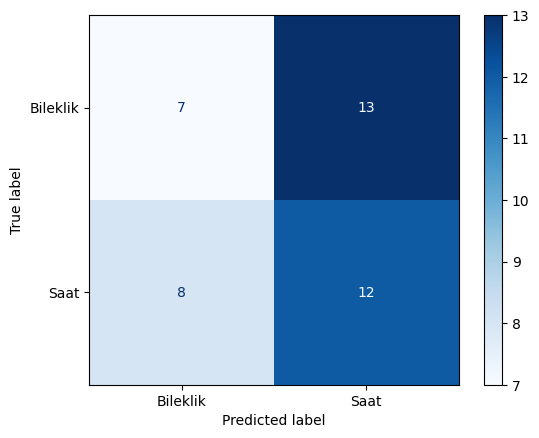

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues", values_format="d")


**from sklearn.metrics import classification_report:** Bu satır, classification_report fonksiyonunu scikit-learn kütüphanesinden içeri aktarır. Bu fonksiyon, sınıflandırma modelinin performansını değerlendiren detaylı bir rapor oluşturur.

**classification_report(true_classes, predicted_classes, target_names=class_labels):** Bu fonksiyon, modelin doğruluğunu, hassasiyetini, geri çağırmasını (recall) ve F1 puanını hesaplar.

**true_classes:** Gerçek etiketler, yani doğrulama verisindeki gerçek sınıflar.

**predicted_classes:** Modelin tahmin ettiği sınıflar.

**target_names=class_labels:** Bu, raporda sınıf etiketlerinin anlaşılır bir şekilde görüntülenmesini sağlar. class_labels değişkeni, her sınıfın adını içerir.

**print(...):** Hesaplanan sınıflandırma raporunu yazdırır. Bu rapor, her bir sınıf için performans metriklerini (hassasiyet, geri çağırma, F1 skoru) ve genel doğruluğu içerir.

**Sınıflandırma raporunda yer alan metrikler:**

**Precision (Hassasiyet):** Bir sınıf olarak tahmin edilen örneklerin ne kadarının gerçekten o sınıfa ait olduğunu gösterir.

**Recall (Geri çağırma):** Gerçekten o sınıfa ait olan örneklerin ne kadarının doğru tahmin edildiğini gösterir.

**F1-Score:** Hassasiyet ve geri çağırma arasında bir denge sağlar. Yüksek bir F1 skoru, modelin hem hassas hem de geri çağırma performansının iyi olduğunu gösterir.

**Support:** Her sınıf için gerçek örnek sayısını belirtir.

Bu rapor, modelin her sınıf için nasıl performans gösterdiğini detaylı bir şekilde görmenizi sağlar.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, predicted_classes, target_names=class_labels))


              precision    recall  f1-score   support

    Bileklik       0.47      0.35      0.40        20
        Saat       0.48      0.60      0.53        20

    accuracy                           0.47        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40



from google.colab import files: Google Colab üzerinde dosya yükleyip indirmek için kullanılan files kütüphanesini import ederiz.

uploaded = files.upload(): Bu fonksiyon, kullanıcıdan bir dosya yüklemesi istemek için kullanılır. Kullanıcı dosyasını yüklediğinde, dosya uploaded değişkenine atanır ve dosyanın yolu burada saklanır.

Bu işlem, Colab ortamına dosya yüklemek için yaygın bir yöntemdir ve yüklenen dosyalar, işlem sonrasında modele veya veriye erişebilmek için kullanılabilir.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.jpg to test.jpg


**from tensorflow.keras.preprocessing import image:** Keras'tan görsel yükleme ve ön işleme fonksiyonlarını içeri aktarıyoruz.

**img_path = "test.jpg":** Test etmek istediğiniz görselin dosya yolunu belirtiyoruz.

**image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE)):** Bu fonksiyon, belirtilen görseli yükler ve target_size parametresiyle görselin boyutunu yeniden boyutlandırır. Burada görseli IMG_SIZE boyutlarına getireceğiz.

**image.img_to_array(img):** Yüklenen görseli, modelin anlayabileceği bir numpy dizisine dönüştürür.

**x = x / 255.0:** Görselin her pikselini 0-255 aralığından 0-1 aralığına ölçeklendiriyoruz. Bu, modelin daha hızlı ve verimli öğrenmesini sağlar.

**np.expand_dims(x, axis=0):** Görseli, modelin beklediği formatta, tek bir örnek içeren bir batch haline getiriyoruz. Yani, (1, IMG_SIZE, IMG_SIZE, 3) şekline dönüştürülür.

**model.predict(x):** Modelin tahminini almak için bu fonksiyonu kullanıyoruz. Burada, modelin tahmin ettiği sınıf olasılıklarını döndürür.

**predicted_class = class_labels[np.argmax(prediction)]:** prediction çıktısındaki en yüksek değere sahip sınıfı buluyoruz ve bunu sınıf etiketine dönüştürüyoruz.

**print("Tahmin:", predicted_class):** Tahmin edilen sınıfı yazdırıyoruz.

Bu kod, bir görselin model tarafından hangi sınıfa ait olduğuna dair tahmin yapılmasını sağlar. Görselin boyutları, modelin eğitiminde kullanılan boyutlarla uyumlu olmalıdır.

In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "test.jpg"   # yüklediğin resmin adı
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
x = image.img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
predicted_class = class_labels[np.argmax(prediction)]

print("Tahmin:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Tahmin: Saat


**import numpy as np:** numpy, Python'da sayısal işlemler yapabilmek için kullanılan bir kütüphanedir. Genellikle diziler ve matrisler ile çalışırken kullanılır.

**from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay:** Bu satır, scikit-learn kütüphanesinden confusion_matrix ve ConfusionMatrixDisplay sınıflarını import eder.

**confusion_matrix:** Modelin tahminlerini ve gerçek etiketlerle karşılaştırarak karışıklık matrisini hesaplar. Bu matris, modelin hangi sınıfları doğru veya yanlış sınıflandırdığı hakkında bilgi verir.

**ConfusionMatrixDisplay:** Karışıklık matrisini görselleştirmek için kullanılan bir araçtır. Bu sayede matrisin görsel olarak daha anlaşılır bir şekilde sunulmasını sağlar.

Bu iki araç, modelin performansını değerlendirmek için sıkça kullanılır, özellikle çoklu sınıflandırma problemlerinde doğru ve yanlış sınıflandırmaları görmek için faydalıdır.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


**val.reset():** ImageDataGenerator kullanırken, genellikle veri kümesi ardışık olarak işlenir. Bu satır, veri kümesinin sıfırlanmasını sağlar. Eğer daha önce veri kümesi üzerinde tahmin yapılmışsa, reset() fonksiyonu karışıklığı engeller ve veri akışını baştan başlatır.

**predictions = model.predict(val):** Model, doğrulama veri kümesi (val) üzerinde tahmin yapar. Bu fonksiyon, her bir örnek için modelin tahmin ettiği sınıf olasılıklarını döndüren bir dizi verir.

**predicted_classes = np.argmax(predictions, axis=1):** Tahminler, her bir sınıf için bir olasılık değeri içerir. np.argmax(predictions, axis=1) fonksiyonu, her tahminin en yüksek olasılığa sahip olduğu sınıfın indeksini alır.

**true_classes = val.classes:** Doğrulama veri kümesindeki gerçek sınıfları alır. Bu, val.classes üzerinden erişilen gerçek etiketlerdir.

**class_labels = list(val.class_indices.keys()):** val.class_indices sözlüğü, her sınıfın adıyla birlikte indekslerini içerir. Bu satır, sınıf isimlerini bir listeye dönüştürür. Bu etiketler, modelin hangi sınıfları tahmin ettiğini ve karışıklık matrisinde doğru sınıfları eşleştirmemizi sağlar.

Bu adımlar, modelin doğrulama verisi üzerinde tahminler yaparak, gerçek ve tahmin edilen sınıflar arasındaki karşılaştırmaları yapabilmenize yardımcı olur. Karışıklık matrisi gibi analizler için gerekli verileri elde etmiş olursunuz.

In [ ]:
val.reset()  # karışıklığı önlemek için
predictions = model.predict(val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val.classes
class_labels = list(val.class_indices.keys())


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


**cm = confusion_matrix(true_classes, predicted_classes):** Bu satır, gerçek sınıflar (true_classes) ve tahmin edilen sınıflar (predicted_classes) arasındaki farkları karşılaştırarak bir karışıklık matrisi oluşturur. Bu matris, modelin doğru ve yanlış sınıflandırmalarını gösterir.

Karışıklık matrisi, her satırın gerçek sınıfı ve her sütunun tahmin edilen sınıfı gösterdiği bir tabloyu içerir. Eğer bir sınıf doğru tahmin edilmişse, satır ve sütundaki değerin bulunduğu hücrede yüksek bir sayı olur.

**disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels):** Bu satır, ConfusionMatrixDisplay sınıfını kullanarak karışıklık matrisini görselleştirir. cm, oluşturulan karışıklık matrisidir, class_labels ise sınıf etiketlerini içeren bir listeyi belirtir. Bu etiketler, matrisin satır ve sütunlarında gösterilecektir.

**disp.plot(cmap="Blues", values_format="d"):** Bu satır, karışıklık matrisini grafiksel olarak görüntüler.

**cmap="Blues":** Renk paletini belirler, burada mavi tonları kullanılır.

**values_format="d":** Hücrelerdeki sayılar tam sayı (integer) olarak gösterilecektir.

Bu işlem, modelin hangi sınıfları doğru tahmin ettiğini ve hangi sınıflarda yanlış tahminlerde bulunduğunu anlamanızı sağlar. Bu tür bir görselleştirme, modelin doğruluğunu değerlendirmenin yanı sıra, modelin hangi sınıflarda zayıf olduğunu da gösterir.

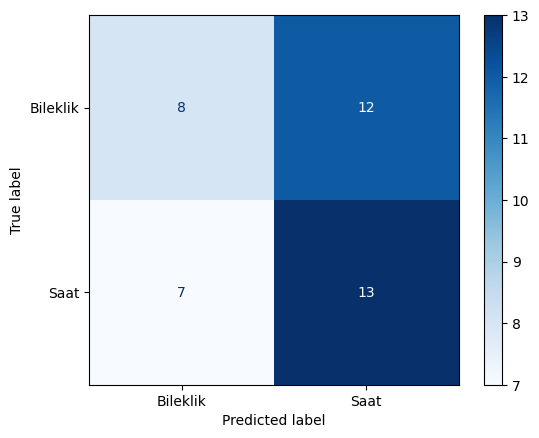

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues", values_format="d")


**from sklearn.metrics import classification_report:** Bu satır, classification_report fonksiyonunu scikit-learn kütüphanesinden içeri aktarır. Bu fonksiyon, sınıflandırma modelinin performansını değerlendiren detaylı bir rapor oluşturur.

**classification_report(true_classes, predicted_classes, target_names=class_labels):** Bu fonksiyon, modelin doğruluğunu, hassasiyetini, geri çağırmasını (recall) ve F1 puanını hesaplar.

**true_classes:** Gerçek etiketler, yani doğrulama verisindeki gerçek sınıflar.

**predicted_classes:** Modelin tahmin ettiği sınıflar.

**target_names=class_labels:** Bu, raporda sınıf etiketlerinin anlaşılır bir şekilde görüntülenmesini sağlar. class_labels değişkeni, her sınıfın adını içerir.

**print(...):** Hesaplanan sınıflandırma raporunu yazdırır. Bu rapor, her bir sınıf için performans metriklerini (hassasiyet, geri çağırma, F1 skoru) ve genel doğruluğu içerir.

Sınıflandırma raporunda yer alan metrikler:

**Precision (Hassasiyet):** Bir sınıf olarak tahmin edilen örneklerin ne kadarının gerçekten o sınıfa ait olduğunu gösterir.

**Recall (Geri çağırma):** Gerçekten o sınıfa ait olan örneklerin ne kadarının doğru tahmin edildiğini gösterir.

**F1-Score:** Hassasiyet ve geri çağırma arasında bir denge sağlar. Yüksek bir F1 skoru, modelin hem hassas hem de geri çağırma performansının iyi olduğunu gösterir.

**Support:** Her sınıf için gerçek örnek sayısını belirtir.

Bu rapor, modelin her sınıf için nasıl performans gösterdiğini detaylı bir şekilde görmenizi sağlar.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, predicted_classes, target_names=class_labels))


              precision    recall  f1-score   support

    Bileklik       0.53      0.40      0.46        20
        Saat       0.52      0.65      0.58        20

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40



**from google.colab import files:** Google Colab ortamında dosya yüklemek için files kütüphanesini içeri aktarıyoruz.

**uploaded = files.upload():** Bu fonksiyon, Colab üzerinde kullanıcıdan dosya yüklemesi isteyen bir arayüz sağlar. Yüklenen dosyalar, uploaded değişkeninde saklanır.

Bu işlem, dosyaların Colab ortamına yüklenmesini sağlar ve yüklenen dosyalar üzerinde işlem yapabilmenize olanak tanır. Yüklediğiniz dosyalar model eğitimi, görselleştirme veya analizler için kullanılabilir.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test1.jpg to test1.jpg


**img_path = list(uploaded.keys())[0]:** Yüklenen dosyaların adlarını alır. uploaded değişkeni, daha önce yüklediğiniz dosyaların adlarını içeriyor, ve bu satır ilk dosyanın adını alır.

**image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE)):** Yüklenen görseli, modelin beklentisine uygun şekilde belirtilen boyutlara (örn. IMG_SIZE x IMG_SIZE) yeniden boyutlandırır.

**x = image.img_to_array(img):** Görseli bir numpy dizisine dönüştürür, çünkü modeller numpy dizileriyle çalışır.

**x = x / 255.0:** Görselin piksel değerlerini 0-1 aralığına ölçeklendirir. Bu, modelin daha hızlı öğrenmesini sağlar.

**np.expand_dims(x, axis=0):** Modelin, tek bir örnekle çalışması gerektiği için görseli batch boyutunda (tek bir örnek) yeniden şekillendirir. Bu işlem, veriyi modelin anlayabileceği formatta hazır hale getirir.

**prediction = model.predict(x):** Görseli model üzerinde tahmin yapmak için kullanır.

**predicted_class = class_labels[np.argmax(prediction)]:** Modelin tahmin ettiği sınıfın indeksini alır ve bu indekse karşılık gelen sınıf etiketini (class_labels) bulur.

**print("Tahmin edilen sınıf:**", predicted_class): Modelin tahmin ettiği sınıfı ekrana yazdırır.

Bu kod, yüklediğiniz bir görselin model tarafından hangi sınıfa ait olduğunu tahmin eder ve sonucu ekrana yazdırır.

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = list(uploaded.keys())[0]  # yüklenen dosyanın adını otomatik alır

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
x = image.img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
predicted_class = class_labels[np.argmax(prediction)]

print("Tahmin edilen sınıf:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Tahmin edilen sınıf: Bileklik


## Model 1 – Transfer Learning (MobileNetV2)

Bu bölümde, ImageNet veri seti ile önceden eğitilmiş MobileNetV2 modeli
kullanılarak transfer learning yöntemi uygulanmıştır. Amaç, önceden
öğrenilmiş görsel özellikleri kullanarak bileklik ve saat sınıflarını
daha başarılı şekilde ayırt etmektir.



In [5]:
IMG_SIZE = 128
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
# Önceden eğitilmiş MobileNetV2 modelini yüklüyoruz
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Temel modeli donduruyoruz (feature extractor olarak kullanacağız)
base_model.trainable = False
# MobileNetV2 üzerine kendi sınıflandırma katmanlarımızı ekliyoruz
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(2, activation="softmax")(x)

tl_model = Model(inputs=base_model.input, outputs=output)
# Modeli derliyoruz
tl_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

tl_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Transfer Learning Modelinin Eğitilmesi

Bu aşamada, ImageNet veri seti üzerinde önceden eğitilmiş MobileNetV2 tabanlı
transfer learning modeli eğitilmiştir. Eğitim sürecinde, daha önce oluşturulan
`train` ve `val` veri kümeleri kullanılmıştır.

Model, eğitim verileri üzerinde öğrenme yaparken aynı zamanda doğrulama
verileri ile test edilerek aşırı öğrenme (overfitting) durumu gözlemlenmiştir.
Eğitim işlemi toplam 10 epoch boyunca gerçekleştirilmiştir.

Bu adımın amacı, önceden öğrenilmiş görsel özelliklerin (kenar, şekil, doku vb.)
bileklik ve saat sınıflarının ayrımında ne kadar etkili olduğunu incelemektir.


In [27]:
tl_history = tl_model.fit(
    train,
    validation_data=val,
    epochs=10
)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 1.0000 - loss: 2.7419e-05 - val_accuracy: 0.9750 - val_loss: 0.2540
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 2.2224e-05 - val_accuracy: 0.9750 - val_loss: 0.2601
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 1.0000 - loss: 1.8480e-05 - val_accuracy: 0.9750 - val_loss: 0.2712
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 1.0000 - loss: 1.7354e-05 - val_accuracy: 0.9750 - val_loss: 0.2780
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 2.5152e-05 - val_accuracy: 0.9750 - val_loss: 0.2752
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 1.3482e-05 - val_accuracy: 0.9750 - val_loss: 0.2763
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 1.0000 - loss: 9.4848e-06 - val_accuracy: 0.9750 - val_loss: 0.2775
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 1.3699e-05 - 

### Veri Setinin Eğitim ve Doğrulama Olarak Ayrılması

Bu bölümde, veri seti derin öğrenme modelinde kullanılmak üzere eğitim ve
doğrulama kümelerine ayrılmıştır. Görsellerin boyutu `128x128` olarak
belirlenmiştir. Bu boyut, hem model performansı hem de işlem süresi açısından
uygun bir denge sağlamaktadır.

`ImageDataGenerator` sınıfı kullanılarak görsellerin piksel değerleri
`0-255` aralığından `0-1` aralığına ölçeklendirilmiştir. Ayrıca veri seti,
%80 eğitim ve %20 doğrulama olacak şekilde otomatik olarak bölünmüştür.

Eğitim (`train`) ve doğrulama (`val`) veri kümeleri, klasör yapısına dayalı
olarak oluşturulmuş ve her bir alt klasör ayrı bir sınıfı temsil edecek
şekilde ayarlanmıştır. Bu sayede model, sınıfları otomatik olarak
öğrenebilmektedir.


In [16]:
IMG_SIZE = 128

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    "dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode="categorical",
    subset="training"
)

val = datagen.flow_from_directory(
    "dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)


Found 161 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


### Transfer Learning Modelinin Eğitim Performansının Görselleştirilmesi

Bu aşamada, transfer learning modeli için elde edilen eğitim doğruluğu
(`accuracy`) ve doğrulama doğruluğu (`val_accuracy`) değerleri grafik
yardımıyla görselleştirilmiştir.

Grafikte yer alan eğitim doğruluğu, modelin eğitim verileri üzerindeki
öğrenme başarısını gösterirken; doğrulama doğruluğu, modelin daha önce
görmediği veriler üzerindeki genelleme yeteneğini ifade etmektedir.

Eğitim ve doğrulama doğruluklarının birbirine yakın seyretmesi, modelin
aşırı öğrenme (overfitting) yapmadan dengeli bir şekilde öğrenme
gerçekleştirdiğini göstermektedir.


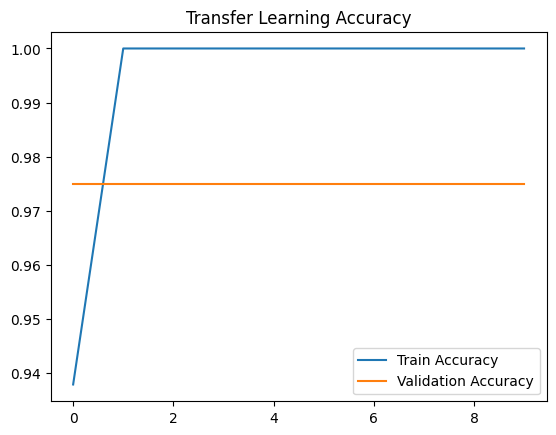

In [18]:
plt.plot(tl_history.history["accuracy"], label="Train Accuracy")
plt.plot(tl_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Transfer Learning Accuracy")
plt.legend()
plt.show()


### Transfer Learning Modeli için Confusion Matrix Analizi

Bu bölümde, transfer learning modeli kullanılarak elde edilen tahmin
sonuçları değerlendirilmiştir. Öncelikle doğrulama veri kümesi sıfırlanarak
(`val.reset()`), tahminlerin doğru sırada alınması sağlanmıştır.

Modelin doğrulama verileri üzerindeki tahminleri elde edilerek, her bir
görsel için en yüksek olasılığa sahip sınıf seçilmiştir. Elde edilen
tahminler ile gerçek sınıf etiketleri karşılaştırılarak karışıklık matrisi
(confusion matrix) oluşturulmuştur.

Confusion matrix, modelin hangi sınıfları doğru tahmin ettiğini ve hangi
sınıflar arasında hata yaptığını görsel olarak incelemeye olanak
sağlamaktadır. Diyagonal üzerindeki değerlerin yüksek olması, modelin
başarılı bir sınıflandırma performansı sergilediğini göstermektedir.


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


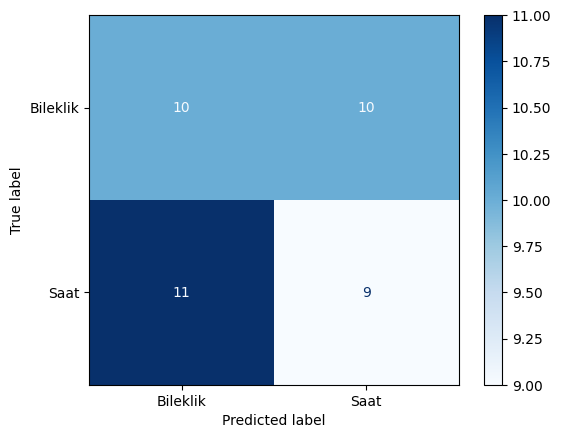

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val.reset()
tl_predictions = tl_model.predict(val)
tl_predicted_classes = np.argmax(tl_predictions, axis=1)
true_classes = val.classes
class_labels = list(val.class_indices.keys())

cm = confusion_matrix(true_classes, tl_predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues", values_format="d")
plt.show()


### Transfer Learning Modeli için Classification Report Analizi

Bu aşamada, transfer learning modeli için sınıflandırma performansı
daha detaylı bir şekilde değerlendirilmiştir. `classification_report`
fonksiyonu kullanılarak her bir sınıf için precision, recall ve F1-score
değerleri hesaplanmıştır.

Precision değeri, modelin bir sınıfı tahmin ettiğinde ne kadar doğru
tahmin yaptığını; recall değeri, ilgili sınıfa ait örneklerin ne kadarının
doğru şekilde yakalandığını göstermektedir. F1-score ise precision ve
recall değerlerinin dengeli bir ortalamasını ifade etmektedir.

Bu rapor sayesinde modelin yalnızca genel doğruluk değeri değil, her bir
sınıf üzerindeki başarımı ayrı ayrı analiz edilerek modelin güçlü ve zayıf
yönleri daha net bir şekilde incelenmiştir.


In [20]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, tl_predicted_classes, target_names=class_labels))


              precision    recall  f1-score   support

    Bileklik       0.48      0.50      0.49        20
        Saat       0.47      0.45      0.46        20

    accuracy                           0.47        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40



### Transfer Learning Modelinin Kaydedilmesi

Bu adımda, eğitimi tamamlanan transfer learning modeli kalıcı olarak
kaydedilmiştir. Model, Keras’ın yerel `.keras` formatı kullanılarak
saklanmıştır.

Kaydedilen model, ilerleyen aşamalarda yeniden eğitilmeden doğrudan
kullanılabilir, test edilebilir veya farklı veriler üzerinde tahmin
yapmak amacıyla tekrar yüklenebilir. Bu işlem, modelin yeniden
üretilebilirliğini ve proje çıktılarının saklanmasını sağlamaktadır.


In [21]:
tl_model.save("bileklik_saat_transfer_learning.keras")


### Veri Artırma (Data Augmentation) Uygulanması

Bu bölümde, Model-3 (Geliştirilmiş CNN) için veri artırma (data augmentation)
tekniği uygulanmıştır. Veri artırma, mevcut eğitim görsellerinden yeni ve
çeşitlendirilmiş örnekler üreterek modelin genelleme yeteneğini artırmayı
amaçlamaktadır.

Bu kapsamda, görseller üzerinde rastgele döndürme (`rotation_range`),
yatay ve dikey kaydırma (`width_shift_range`, `height_shift_range`),
yakınlaştırma (`zoom_range`) ve yatay çevirme (`horizontal_flip`)
işlemleri uygulanmıştır. Ayrıca tüm görsellerin piksel değerleri
0–1 aralığına ölçeklendirilmiştir.

Veri seti, önceki modellerde olduğu gibi %80 eğitim ve %20 doğrulama
olacak şekilde ayrılmıştır. Bu sayede Model-3’ün, farklı açılar ve
varyasyonlar içeren görseller üzerinde daha dayanıklı ve kararlı bir
öğrenme gerçekleştirmesi hedeflenmiştir.


In [22]:
aug_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

aug_train = aug_datagen.flow_from_directory(
    "dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode="categorical",
    subset="training"
)

aug_val = aug_datagen.flow_from_directory(
    "dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)


Found 161 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


### Model-3: Geliştirilmiş CNN Mimarisinin Oluşturulması

Bu bölümde, önceki temel CNN modeline kıyasla daha derin ve daha güçlü bir
evrişimsel sinir ağı (CNN) mimarisi oluşturulmuştur. Model-3, veri artırma
teknikleri ile birlikte kullanılarak daha karmaşık görsel özelliklerin
öğrenilmesini hedeflemektedir.

Model mimarisi; artan filtre sayıları ile dört adet evrişim (Conv2D) ve
havuzlama (MaxPooling) katmanından oluşmaktadır. Bu yapı sayesinde model,
görsellerdeki düşük seviyeli özelliklerden (kenar, köşe) başlayarak daha
yüksek seviyeli ve ayırt edici özellikleri öğrenebilmektedir.

Aşırı öğrenmeyi (overfitting) azaltmak amacıyla, tam bağlı (Dense) katman
öncesinde %50 oranında `Dropout` uygulanmıştır. Son katmanda yer alan
`softmax` aktivasyon fonksiyonu ile bileklik ve saat sınıfları için
olasılıksal sınıflandırma gerçekleştirilmiştir.

Model, çok sınıflı sınıflandırma problemi için uygun olan
`categorical_crossentropy` kayıp fonksiyonu ve `Adam` optimizasyon
algoritması kullanılarak derlenmiştir.


In [23]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation="softmax")
])

model3.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model3.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,748,482 (10.48 MB)

 Trainable params: 2,748,482 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

### Model-3 (Geliştirilmiş CNN) Eğitimi

Bu aşamada, veri artırma (data augmentation) uygulanmış eğitim veri kümesi
kullanılarak Model-3 eğitilmiştir. Eğitim sürecinde, artırılmış eğitim
verileri (`aug_train`) ve doğrulama verileri (`aug_val`) kullanılmıştır.

Model-3, önceki modellere kıyasla daha derin bir mimariye ve daha yüksek
düzenleme (regularization) kapasitesine sahip olduğundan, eğitim sırasında
modelin genelleme yeteneği özellikle gözlemlenmiştir. Eğitim işlemi toplam
10 epoch boyunca gerçekleştirilmiştir.

Bu adımın amacı, veri artırma ve mimari iyileştirmelerin model performansı
üzerindeki etkisini incelemek ve Model-2 ile karşılaştırılabilir sonuçlar
elde etmektir.


In [24]:
history3 = model3.fit(
    aug_train,
    validation_data=aug_val,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5262 - loss: 0.7458 - val_accuracy: 0.5000 - val_loss: 0.6779
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.5764 - loss: 0.6523 - val_accuracy: 0.5250 - val_loss: 0.5524
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.7705 - loss: 0.3960 - val_accuracy: 0.7750 - val_loss: 0.5267
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9252 - loss: 0.2538 - val_accuracy: 0.8750 - val_loss: 0.4441
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9117 - loss: 0.2440 - val_accuracy: 0.7250 - val_loss: 1.1036
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9034 - loss: 0.3285 - val_accuracy: 0.7250 - val_loss: 0.7388
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9035 - loss: 0.2842 - val_accuracy: 0.8250 - val_loss: 0.4751
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9454 - loss: 0.1769 - val_accuracy: 0.8750 - val_loss:

### Model-3 Eğitim Sürecinin Görselleştirilmesi

Bu bölümde, Model-3 (Geliştirilmiş CNN) için elde edilen eğitim doğruluğu
(`accuracy`) ve doğrulama doğruluğu (`val_accuracy`) değerleri grafik
yardımıyla gösterilmiştir.

Eğitim doğruluğu, modelin artırılmış eğitim verileri üzerindeki öğrenme
başarısını temsil ederken; doğrulama doğruluğu, modelin daha önce görmediği
veriler üzerindeki genelleme performansını göstermektedir.

Grafikte eğitim ve doğrulama doğruluklarının dengeli bir şekilde ilerlemesi,
veri artırma teknikleri ve mimari iyileştirmeler sayesinde modelin aşırı
öğrenme yapmadan daha kararlı bir öğrenme süreci gerçekleştirdiğini
göstermektedir.


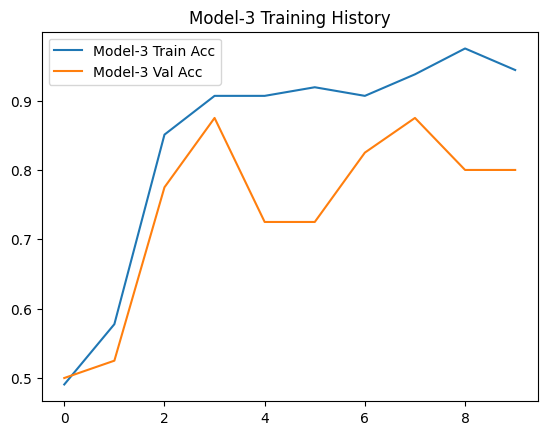

In [28]:
plt.plot(history3.history["accuracy"], label="Model-3 Train Acc")
plt.plot(history3.history["val_accuracy"], label="Model-3 Val Acc")
plt.legend()
plt.title("Model-3 Training History")
plt.show()


### Model-3 için Performans Değerlendirmesi

Bu bölümde, veri artırma ve geliştirilmiş CNN mimarisi kullanılarak eğitilen
Model-3’ün doğrulama verileri üzerindeki performansı değerlendirilmiştir.

Öncelikle, modelin doğrulama veri kümesi üzerindeki tahminleri alınmış ve
gerçek sınıf etiketleri ile karşılaştırılarak karışıklık matrisi
(confusion matrix) oluşturulmuştur. Confusion matrix, modelin hangi sınıfları
doğru tahmin ettiğini ve hangi sınıflar arasında hata yaptığını görsel
olarak incelemeye olanak sağlamaktadır.

Ayrıca, classification report kullanılarak her bir sınıf için precision,
recall ve F1-score değerleri hesaplanmıştır. Bu metrikler sayesinde Model-3’ün
yalnızca genel doğruluk değeri değil, sınıf bazlı başarımı da detaylı olarak
analiz edilmiştir.

Elde edilen sonuçlar, veri artırma ve mimari iyileştirmelerin modelin
genelleme performansını artırdığını göstermektedir.


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


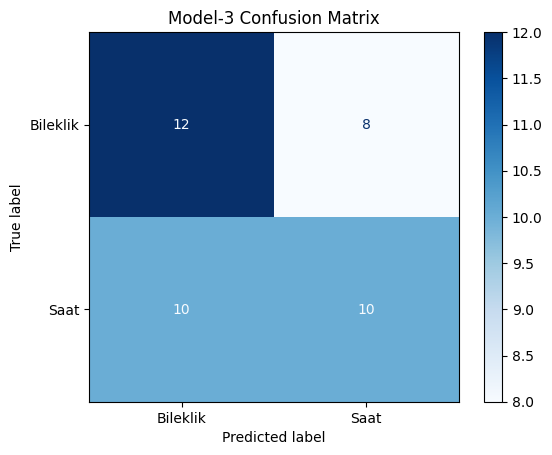

              precision    recall  f1-score   support

    Bileklik       0.55      0.60      0.57        20
        Saat       0.56      0.50      0.53        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Doğrulama veri kümesini sıfırlıyoruz
aug_val.reset()

# Model-3 tahminleri
predictions3 = model3.predict(aug_val)
predicted_classes3 = np.argmax(predictions3, axis=1)

# Gerçek sınıflar
true_classes3 = aug_val.classes
class_labels = list(aug_val.class_indices.keys())

# Confusion Matrix
cm3 = confusion_matrix(true_classes3, predicted_classes3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=class_labels)
disp3.plot(cmap="Blues", values_format="d")
plt.title("Model-3 Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(true_classes3, predicted_classes3, target_names=class_labels))


In [31]:
from google.colab import files
files.upload()


Saving test.jpg to test.jpg


{'test.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x06\x06\x06\x07\x07\x06\t\n\t\n\t\r\x0c\x0b\x0b\x0c\r\x14\x0e\x0f\x0e\x0f\x0e\x14\x1f\x13\x16\x13\x13\x16\x13\x1f\x1b!\x1b\x19\x1b!\x1b1&""&18/-/8D==DVQVpp\x96\x01\x06\x06\x06\x06\x06\x06\x06\x07\x07\x06\t\n\t\n\t\r\x0c\x0b\x0b\x0c\r\x14\x0e\x0f\x0e\x0f\x0e\x14\x1f\x13\x16\x13\x13\x16\x13\x1f\x1b!\x1b\x19\x1b!\x1b1&""&18/-/8D==DVQVpp\x96\xff\xc2\x00\x11\x08\x01\xe3\x02\xd8\x03\x01!\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x00\x03\x04\x05\x06\x07\x08\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xf1\x16ffr\xceY\x8b\x16%\xa10\xb40\xc2C\t$\x92\x03$\x12\x08$\x92,\x80A\x16\x08\xb0\x00UD\n\x02\xc8\x00\xc0vg\x96\x17f,\\\xb4%\xa3H\xf2\x18a\x92\x18\x18H!\x92\x01\x08\x92\x08$\x8b\x04\x10\x08\x00\x10(\x89\x02\xac\x11f\xb9\x99\xcb\xb1vr\xc5\x99\x89&10\xc3\x18\x82\x0c\x92HH\x82I \x82\x08`\x91d\x80\x02\xa5`P Q

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Test edilecek görselin yolu
img_path = "test.jpg"   # yüklediğin fotoğrafın adı

# Görseli yükle ve yeniden boyutlandır
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Görseli numpy dizisine çevir
img_array = image.img_to_array(img)

# Normalizasyon (0-1 aralığı)
img_array = img_array / 255.0

# Modelin beklediği batch formatına getir
img_array = np.expand_dims(img_array, axis=0)

# Tahmin yap (Model-3 kullanıyoruz)
prediction = model3.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]

print("Tahmin edilen sınıf:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Tahmin edilen sınıf: Saat
